In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [119]:
def hist(df, ax, log=False):
    ax.hist(df.values.reshape(-1), bins=200)
    if log:
        ax.set_yscale("log")

def double_hist(df, ax):
    bins = 50
    ax[0].hist(df.values.reshape(-1), bins=bins)
    ax[0].set_yscale("log")
    ax[1].hist(df.values.reshape(-1), bins=bins)
    ax[2].hist(df.values.mean(axis=0), bins=bins)
    ax[2].set_yscale("log")
    ax[3].hist(df.values.mean(axis=0), bins=bins)

def plot(filename):
    cohorts_dir = Path("../cohorts").resolve()
    assert cohorts_dir.exists() and cohorts_dir.is_dir()    
    df = pd.read_csv(cohorts_dir / filename, sep="\t", compression="gzip", index_col=0).T
    print("{}:\t{}".format(filename, df.shape))
    
    fig, ax = plt.subplots(4, 4, figsize=(15, 7))
    double_hist(df, ax[0])
    
    df = df.div(df.sum(axis=1), axis=0)
    double_hist(df, ax[1])
    
    df = np.log(df)
    double_hist(df, ax[2])
    
    scaler = StandardScaler()
    df = pd.DataFrame(
        scaler.fit_transform(df), 
        columns=df.columns, 
        index=df.index
    )
    double_hist(df, ax[3])
    plt.tight_layout()
    
    print(df.T.head().T.head())
    
    plt.show()

Augustine/expressions.tsv.gz:	(52, 24442)
               A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1
GSM478912  0.098846 -0.196759 -0.249763 -3.315310 -1.689705
GSM478913 -0.236149 -0.191840 -0.240394 -4.462775 -1.157146
GSM478914  0.464598 -0.032983  0.062208  0.420941  1.826786
GSM478915 -0.229326 -0.017008  0.092639  0.642197  1.045002
GSM478916 -0.295309 -0.220350 -0.030563  0.211979  1.251367


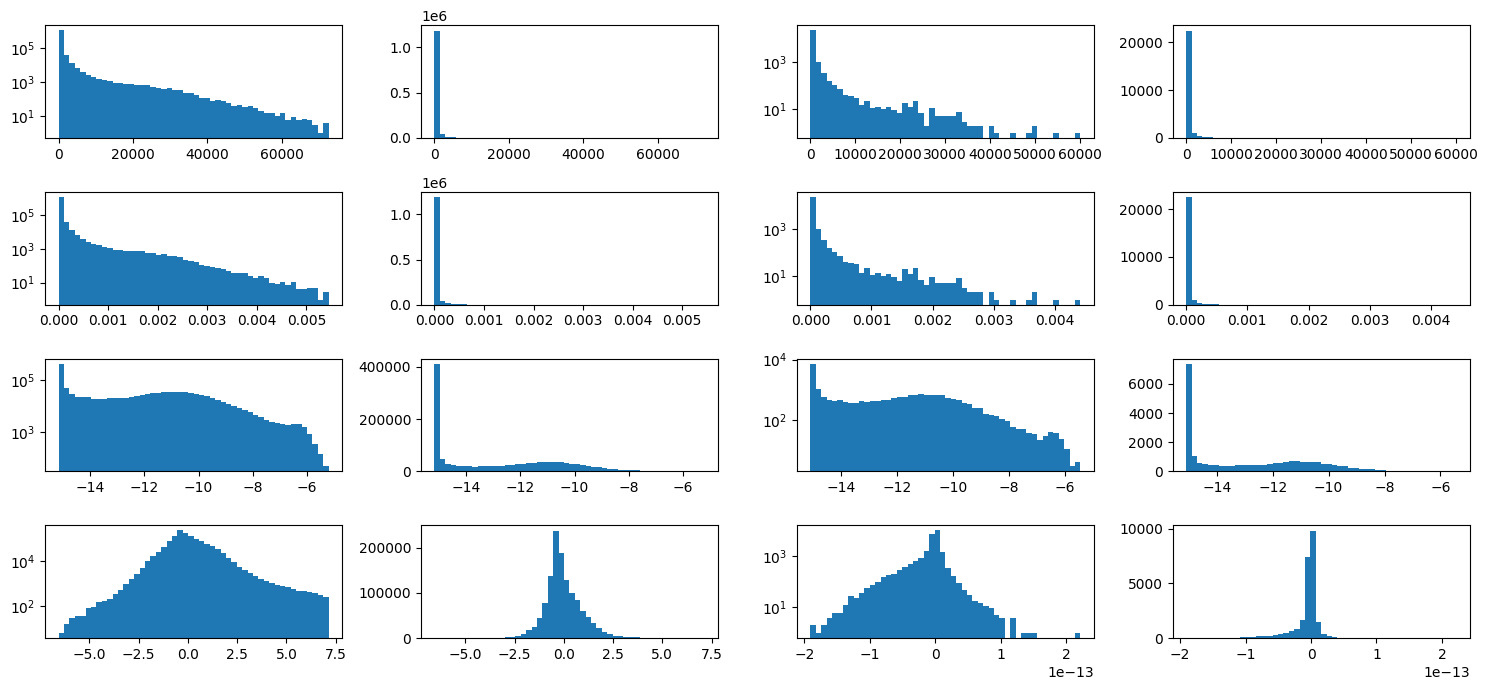

In [120]:
plot("Augustine/expressions.tsv.gz")

Bogunovic/expressions.tsv.gz:	(44, 24442)
               A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1
GSM476606 -0.470802 -0.908943 -1.014257  0.321957  1.309571
GSM476607 -0.518211 -0.867443 -1.645330 -0.813113  1.859683
GSM476608 -2.572164 -0.006612  0.452735  0.414481 -0.137012
GSM476609 -0.372927  0.013181  0.389573 -0.528170 -0.243654
GSM476610  3.252740 -0.935021 -1.366416 -0.122761 -0.470248


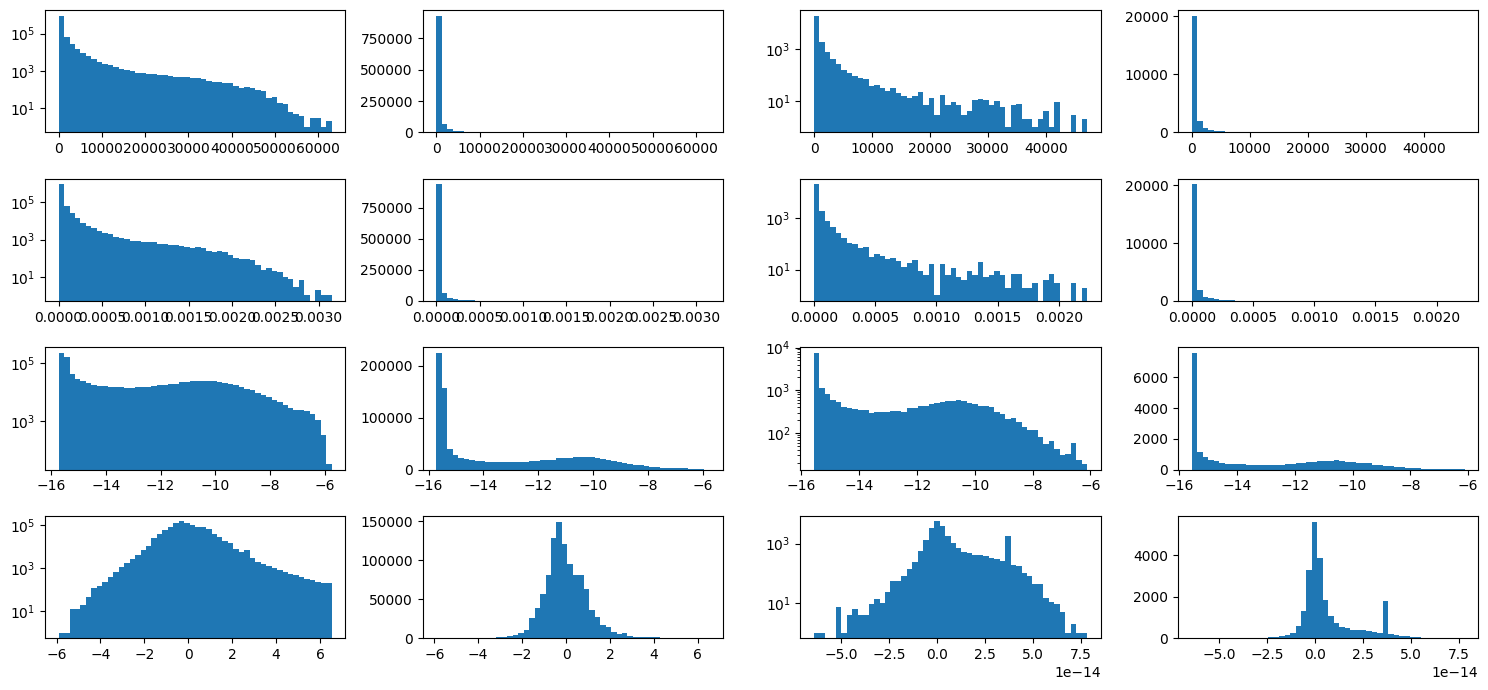

In [121]:
plot("Bogunovic/expressions.tsv.gz")

Hao/expressions.tsv.gz:	(97, 24442)


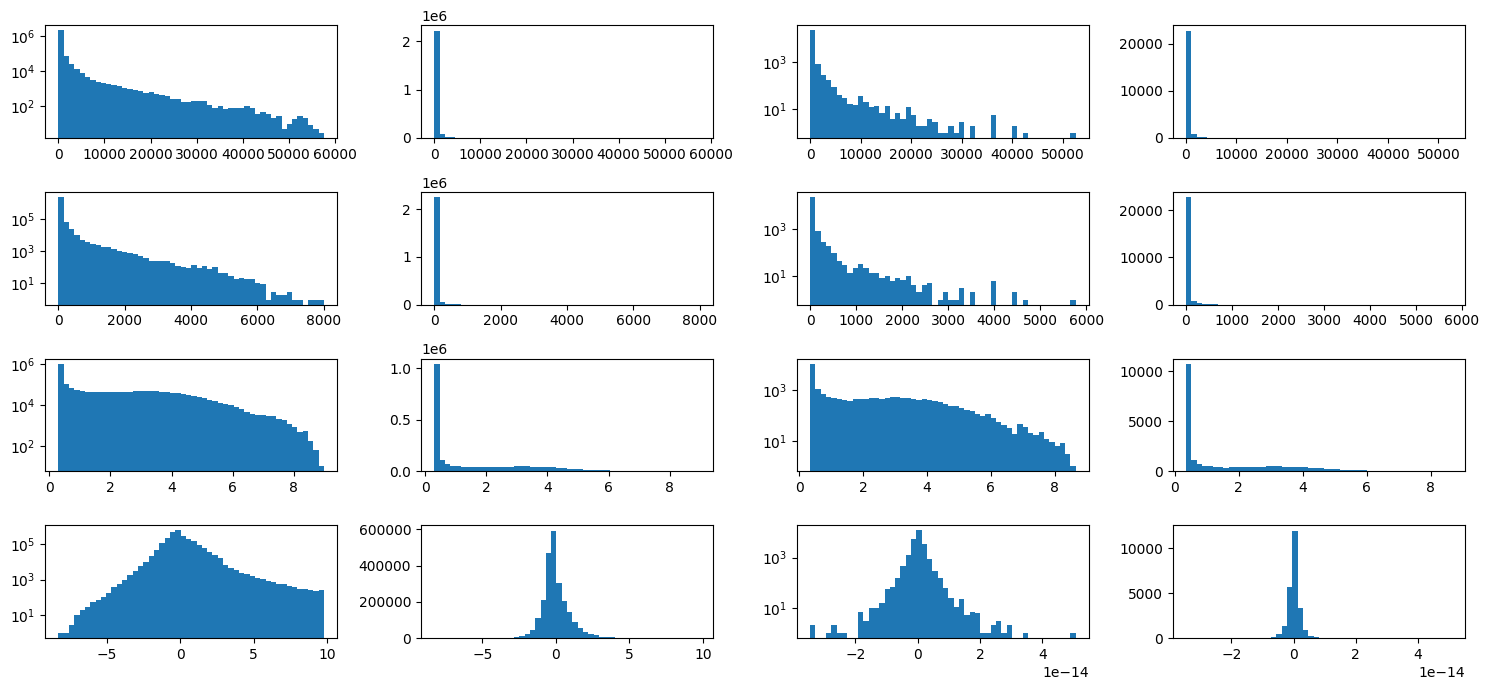

In [104]:
plot("Hao/expressions.tsv.gz")

Raskin/expressions.tsv.gz:	(58, 24442)


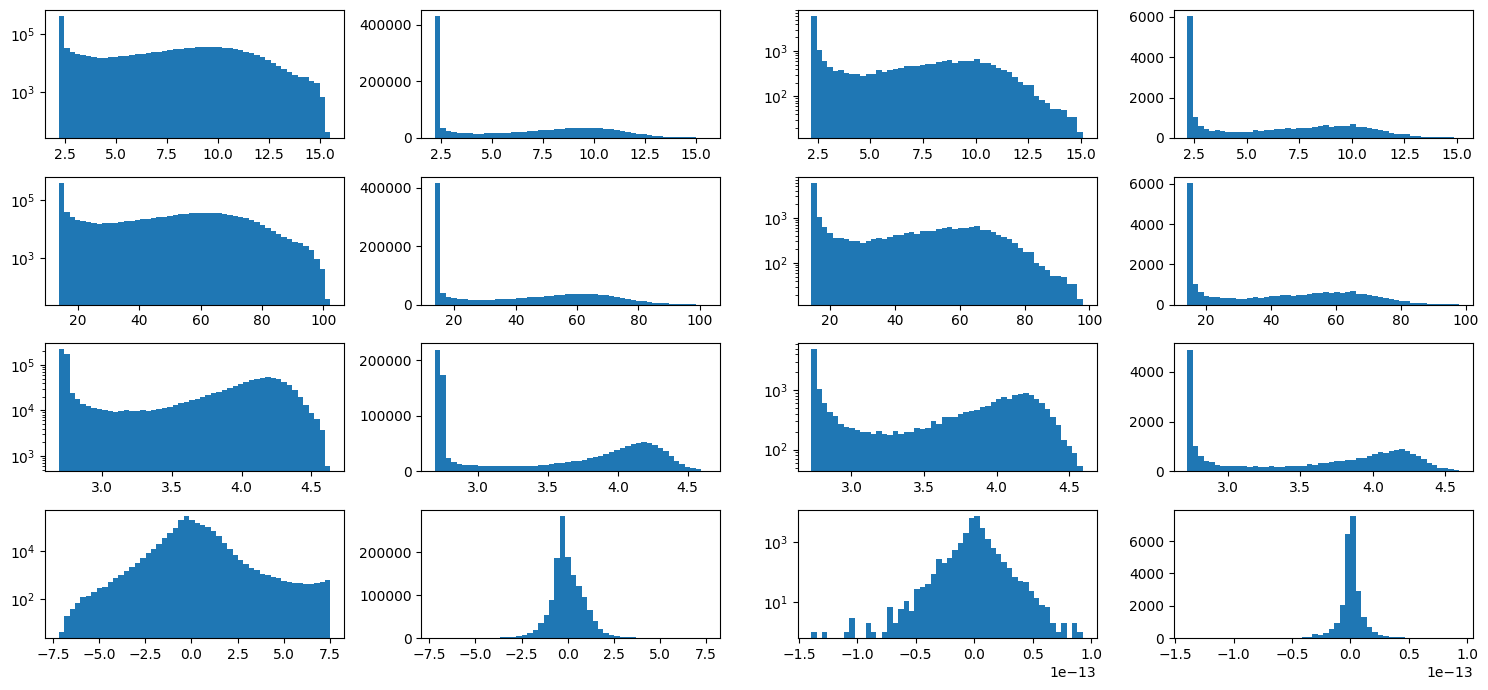

In [105]:
plot("Raskin/expressions.tsv.gz")

TCGA_input_expressions/expressions.tsv.gz:	(412, 20062)


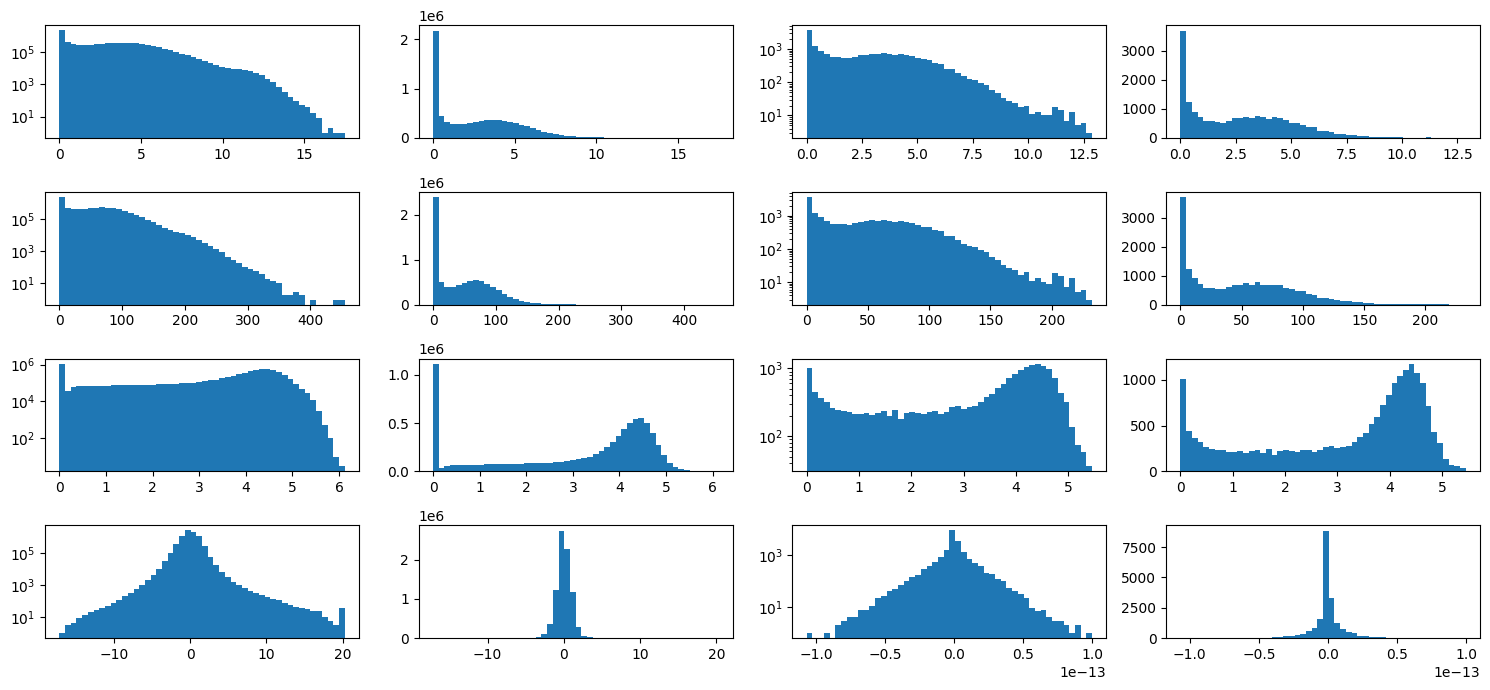

In [106]:
plot("TCGA_input_expressions/expressions.tsv.gz")

Hao/expressions.tsv.gz:	(97, 24442)


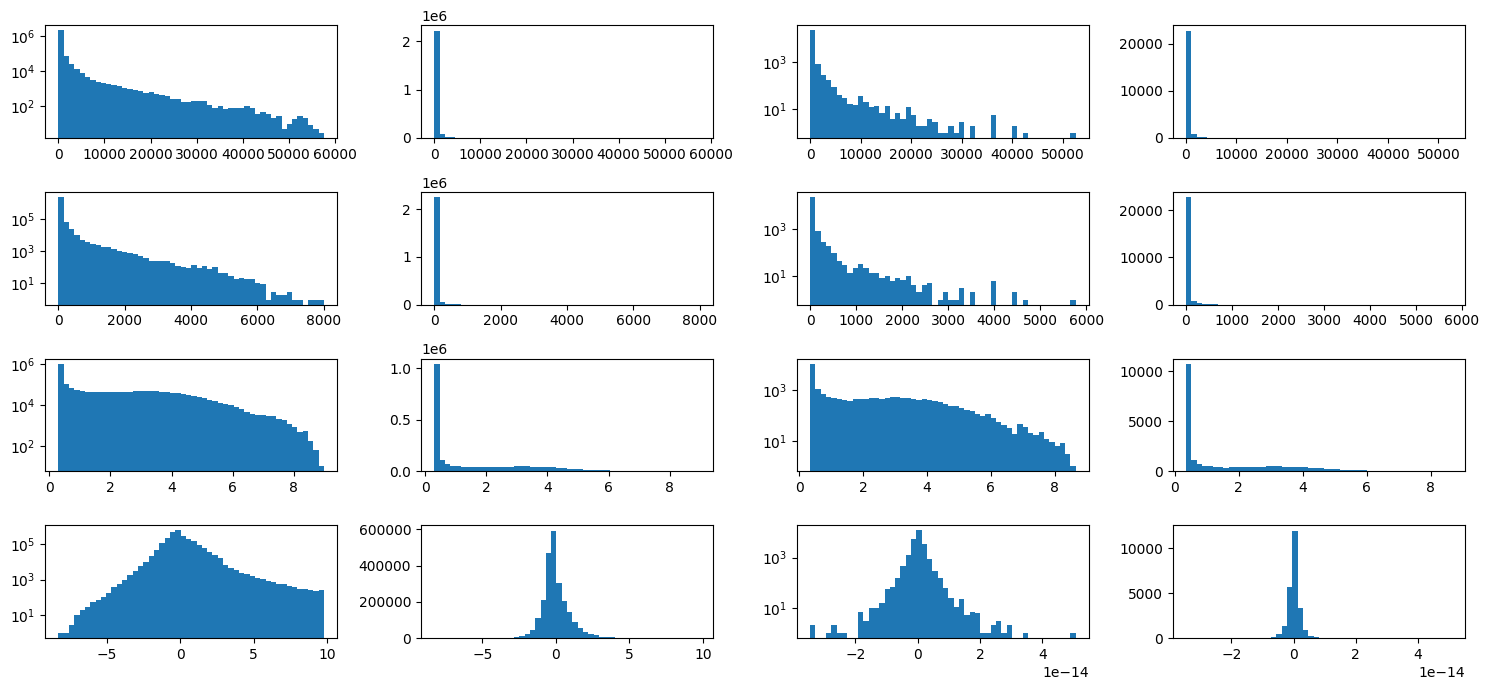

In [107]:
plot("Hao/expressions.tsv.gz")

Ulloa-Montoya/expressions.tsv.gz:	(65, 24442)


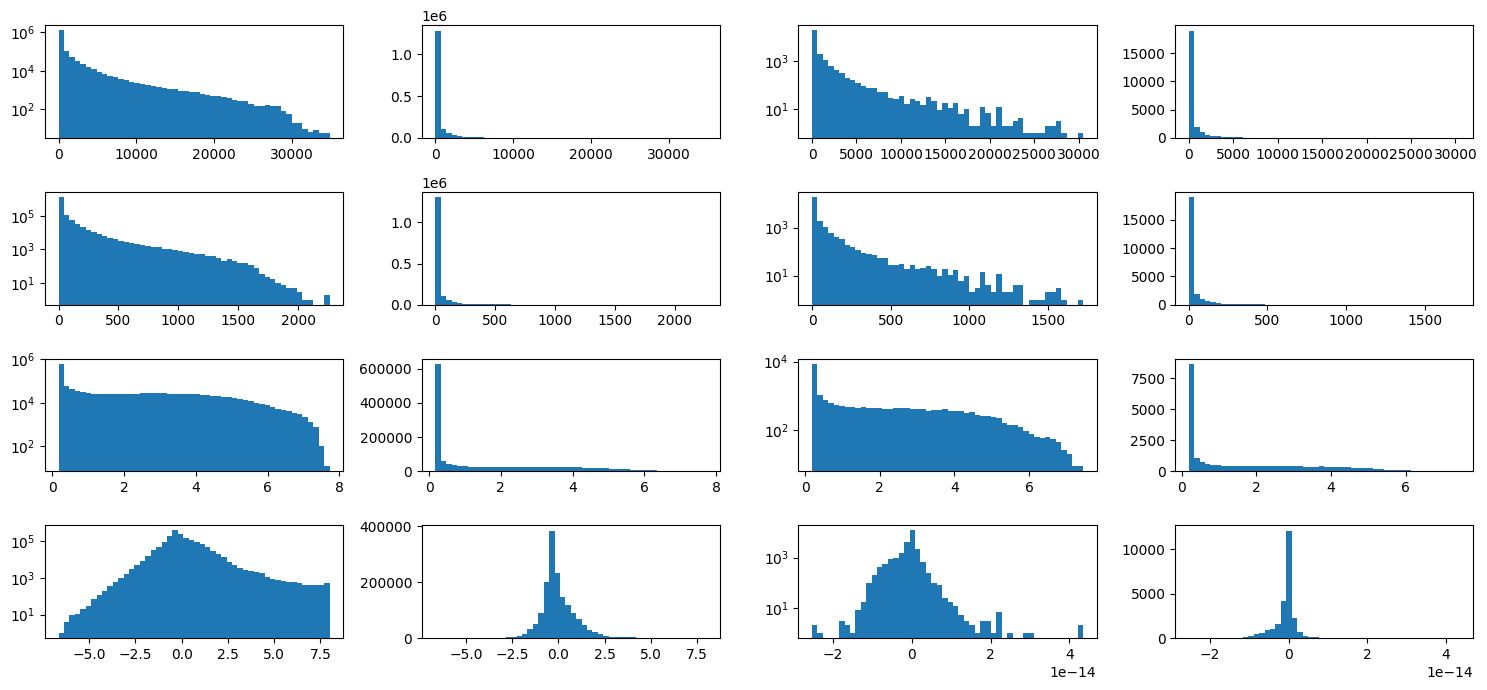

In [108]:
plot("Ulloa-Montoya/expressions.tsv.gz")

In [99]:
tcga_processed_dir = Path("../cohorts/Pan_TCGA/signatures.tsv").resolve()
df = pd.read_csv(tcga_processed_dir, sep="\t", index_col=0).T
df.head()

,Angiogenesis,Endothelium,CAF,Matrix,Matrix_remodeling,Protumor_cytokines,Neutrophil_signature,Granulocyte_traffic,Macrophages,Macrophage_DC_traffic,...,B_cells,NK_cells,Checkpoint_inhibition,Effector_cells,T_cells,Th1_signature,T_cell_traffic,MHCI,EMT_signature,Proliferation_rate
TCGA-OR-A5J1,-0.661531,-0.474094,-1.747577,-2.182482,-1.236812,0.046394,-1.316791,-0.521001,0.037743,-0.490876,...,-0.255350,-0.107928,-0.320426,0.432517,0.527311,-0.086628,0.113541,-2.140541,1.027890,-1.096319
TCGA-OR-A5J2,1.583381,1.424070,0.954718,0.165168,-0.229481,0.749703,-0.548288,-0.404893,0.000000,0.537373,...,0.103632,-0.762869,0.415631,0.000000,1.154286,-0.910847,0.017174,-0.601609,-1.329309,0.045243
TCGA-OR-A5J3,0.267748,-1.519066,-0.533190,-0.546502,2.180185,-0.834455,-0.349687,-0.025436,-0.827868,-1.067597,...,-1.137870,-0.453005,-0.971650,-0.449062,-0.807262,-1.016867,-1.490690,0.102482,0.000000,-0.870316
TCGA-OR-A5J5,-2.647846,-2.290573,-0.559493,-0.956463,0.133336,0.354727,0.996735,-1.391741,-1.056910,-1.822861,...,0.019641,-0.581257,-0.970663,-0.624980,-0.684146,0.093275,-1.200881,-2.283289,0.769120,1.039007
TCGA-OR-A5J6,-0.071126,1.212545,-1.912118,-2.032676,-1.325297,-0.393967,-1.371924,-0.282401,2.007733,1.326364,...,1.667788,0.625164,1.083450,0.666347,0.391231,0.805990,0.000000,0.431077,-2.710735,-1.809489
